In [1]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
# import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_excel('../data/최종_데이터셋.xlsx')

In [4]:
df.head()

,News,label,가격등락비율
0,종돈 종돈 마리 종돈 마리 수입 최고 종개 협 종개 협 신규 종개 협 신규 종돈 장...,1,1.397062
1,돈육 돈육 수입 돈육 수입 최고 자급 률 자급 률 하락 전 년비 전 년비 전 년비 ...,1,0.000632
2,지난해 지난해 수입 지난해 수입 돈육 소비 수입 수입 증가 재고 전지 전지 등 전지...,1,2.406873
3,안전 안전 한 생산 정부 농가 구제역 구제역 백신 구제역 백신 구제역 백신 접종 품...,1,10.301637
4,돈육 돈육 소비 돈육 소비 kg 전 년 kg 우리 우리 국민 우리 국민 돼지고기 돼...,1,9.492842


In [5]:
df=df.fillna("")

### 어떤 단어가 있는지

In [6]:
embedding_list=[]

for week_news in df['News']:
    embedding_list.append(str(week_news))

In [7]:
vocab=[]
for i in range(len(embedding_list)):
    vocab.append(embedding_list[i].split())

In [8]:
len(vocab)

208

In [9]:
vocab_1d=[num for row in vocab for num in row]

In [10]:
vocabulary=set(vocab_1d)

In [11]:
vocab_dic={}
vocab_price={}
vocab_sentiment={}

In [12]:
for i in range(len(embedding_list)):
    for word in vocabulary:
        if word in embedding_list[i]:
            if word in vocab_dic:
                    vocab_dic[word] += 1
                    vocab_price[word]+=df['가격등락비율'][i]
            else:
                    vocab_dic[word] = 1
                    vocab_price[word]=df['가격등락비율'][i]

In [13]:
vocab_price.get('ASF')

-77.47114616669407

### 단어 감정점수 구하는 공식

In [14]:
len(vocab_price)

5365

In [15]:
for word in vocabulary:
    vocab_sentiment[word]=vocab_price.get(str(word))/vocab_dic.get(str(word))

In [16]:
vocab_sentiment

{'밤': 0.0,
 '접속': 0.0,
 '국비': -13.54639777203085,
 '스마트워치': -6.404111710541097,
 '취약점': 1.4916720138503345,
 '세균': 1.3118354364055718,
 '사료량': -8.12514320268581,
 '부분': -0.10551988483796083,
 '강화도': -0.7536894209765659,
 '주지': 0.589873933714311,
 '신뢰구간': 3.371743375334805,
 '컨셉': 1.5947023994293636,
 '티베트': -2.082862428040148,
 '동진': 14.40165494956272,
 '간부': -13.54639777203085,
 '개월내': 0.0,
 '규제': -1.4952975946934373,
 '누락': 1.03665468778711,
 '무관': 6.058350636453103,
 '수습': 2.0351468358286353,
 '택배': -7.339718433928247,
 '세미나': 0.5628060775914331,
 '임진강': 7.20082747478136,
 '링': -3.0712683888434564,
 '상환': 0.0,
 '수컷': -23.30893758616051,
 '널리': -0.8191103277316337,
 '인': 0.014206097735162002,
 '횟수': 1.9119831281147486,
 '나서다': 4.52217034330517,
 '기적처럼': -2.082862428040148,
 '봉화': 3.996189929728527,
 '충남도': -15.13475784509222,
 '정상화': 0.900461365399627,
 '고유': -6.404111710541097,
 '직결': 4.865953220567837,
 'n': 2.9680922506556757,
 '판넬': 0.0,
 '카테고리': 0.0,
 '성장하다': 0.0,
 '터전': -6.2894

In [17]:
dict = sorted(vocab_sentiment.items(), key=lambda x:x[1])

In [18]:
df_dict = pd.DataFrame(dict)
df_dict.columns=(['word','sentiment'])

In [19]:
df_dict.to_excel("./df_dict.xlsx")

In [20]:
dict

[('적성면', -44.67907497370927),
 ('유산', -34.02867384142676),
 ('염려', -23.37827270914425),
 ('화성시', -23.37827270914425),
 ('홍수', -23.37827270914425),
 ('형상', -23.37827270914425),
 ('군데', -23.37827270914425),
 ('제때', -23.37827270914425),
 ('양감면', -23.37827270914425),
 ('수컷', -23.30893758616051),
 ('절대로', -23.30893758616051),
 ('암컷', -23.30893758616051),
 ('케어', -23.30893758616051),
 ('찾기', -23.30893758616051),
 ('가인', -23.30893758616051),
 ('유영국', -23.30893758616051),
 ('정호영', -23.30893758616051),
 ('김성중', -23.30893758616051),
 ('레터', -23.30893758616051),
 ('시연', -23.30893758616051),
 ('곤두박질', -23.30893758616051),
 ('국가대표', -23.30893758616051),
 ('모토로', -23.30893758616051),
 ('산차', -23.30893758616051),
 ('모자라', -23.30893758616051),
 ('퍼포먼스', -23.30893758616051),
 ('박스', -23.30893758616051),
 ('사이드', -23.30893758616051),
 ('SFEED', -23.30893758616051),
 ('런치', -23.30893758616051),
 ('김명규', -23.30893758616051),
 ('연례', -23.30893758616051),
 ('갈말읍', -23.30893758616051),
 ('성대', -23.3089375861

## 뉴스 감정분석

In [21]:
df.tail()

,News,label,가격등락비율
203,양돈 장 양돈 장 관리사 외국인 외국인 근로자 외국인 근로자 숙소 고용노동부 관리사...,1,3.996190
204,한 협회 정부 정부 전국 정부 전국 축산 농가 정부 전국 축산 농가 특별 정부 전국...,1,3.351271
205,출하 두 수가 출하 두 수가 최고 최고 치르다 기록 또 올해 출하 두 수가 출하 두...,2,-12.467987
206,작년 작년 세계 작년 세계 주요 작년 세계 주요 돈육 작년 세계 주요 돈육 수 출국...,2,-10.239710
207,정부 포괄 적 점진 적 환태평양 경 제 동반 자 협정 CPTPP 가입 가입 추진 공...,2,0.000000


In [22]:
for i in range(df.shape[0]):
     df['News'].iloc[i]=df['News'].iloc[i].split()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_19084\1661348746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News'].iloc[i]=df['News'].iloc[i].split()


### 해당하는 뉴스에 키워드에 감정점수 맵핑하기

In [23]:
df['News_sentiment']=0
df['News_sentiment_AVG']=0

In [24]:
for i in range(df.shape[0]):
    for j in range(len(df['News'][i])):
        if df['News'][i][j] in vocab_sentiment:
            df['News_sentiment'][i]+=vocab_sentiment[df['News'][i][j]]
    df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])

C:\Users\jaemin\AppData\Local\Temp\ipykernel_19084\337410577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_sentiment'][i]+=vocab_sentiment[df['News'][i][j]]
C:\Users\jaemin\AppData\Local\Temp\ipykernel_19084\337410577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])
C:\Users\jaemin\AppData\Local\Temp\ipykernel_19084\337410577.py:5: RuntimeWarning: invalid value encountered in double_scalars
  df['News_sentiment_AVG'][i]=df['News_sentiment'][i]/len(df['News'][i])


In [25]:
vocab_sentiment

{'밤': 0.0,
 '접속': 0.0,
 '국비': -13.54639777203085,
 '스마트워치': -6.404111710541097,
 '취약점': 1.4916720138503345,
 '세균': 1.3118354364055718,
 '사료량': -8.12514320268581,
 '부분': -0.10551988483796083,
 '강화도': -0.7536894209765659,
 '주지': 0.589873933714311,
 '신뢰구간': 3.371743375334805,
 '컨셉': 1.5947023994293636,
 '티베트': -2.082862428040148,
 '동진': 14.40165494956272,
 '간부': -13.54639777203085,
 '개월내': 0.0,
 '규제': -1.4952975946934373,
 '누락': 1.03665468778711,
 '무관': 6.058350636453103,
 '수습': 2.0351468358286353,
 '택배': -7.339718433928247,
 '세미나': 0.5628060775914331,
 '임진강': 7.20082747478136,
 '링': -3.0712683888434564,
 '상환': 0.0,
 '수컷': -23.30893758616051,
 '널리': -0.8191103277316337,
 '인': 0.014206097735162002,
 '횟수': 1.9119831281147486,
 '나서다': 4.52217034330517,
 '기적처럼': -2.082862428040148,
 '봉화': 3.996189929728527,
 '충남도': -15.13475784509222,
 '정상화': 0.900461365399627,
 '고유': -6.404111710541097,
 '직결': 4.865953220567837,
 'n': 2.9680922506556757,
 '판넬': 0.0,
 '카테고리': 0.0,
 '성장하다': 0.0,
 '터전': -6.2894

### News_sentiment_AVG이 0이상이면 1, 0미만 2로 라벨링 한다.

In [26]:
df_sorted = df.sort_values('News_sentiment_AVG', ascending=True)

In [27]:
def label_positive(x):
    if x >= 0:
        return 1
    else:
        return 2

# 'News_sentiment_AVG_label' 컬럼에 함수 적용하여 라벨링
df['News_sentiment_AVG_label'] = df['News_sentiment_AVG'].apply(label_positive)

df['new_label']=df['label']

df.loc[df['new_label'] == 0, 'new_label'] = 1

label_percentage=((df['new_label']==df['News_sentiment_AVG_label']).sum()/208)*100

# 가격증가 비율하고 가격감정비율하고 78프로로 일치함
label_percentage

78.36538461538461

In [28]:
df

,News,label,가격등락비율,News_sentiment,News_sentiment_AVG,News_sentiment_AVG_label,new_label
0,"[종돈, 종돈, 마리, 종돈, 마리, 수입, 최고, 종개, 협, 종개, 협, 신규,...",1,1.397062,479.978492,0.388962,1,1
1,"[돈육, 돈육, 수입, 돈육, 수입, 최고, 자급, 률, 자급, 률, 하락, 전, ...",1,0.000632,658.570833,0.332276,1,1
2,"[지난해, 지난해, 수입, 지난해, 수입, 돈육, 소비, 수입, 수입, 증가, 재고...",1,2.406873,902.669177,0.484005,1,1
3,"[안전, 안전, 한, 생산, 정부, 농가, 구제역, 구제역, 백신, 구제역, 백신,...",1,10.301637,1700.895325,1.118274,1,1
4,"[돈육, 돈육, 소비, 돈육, 소비, kg, 전, 년, kg, 우리, 우리, 국민,...",1,9.492842,2155.213073,0.823229,1,1
5,"[값, 값, 최저, 전, 년비, 전, 년비, 전, 년비, 하락, 물량, 물량, 늘,...",2,-15.134758,-663.892677,-0.591178,2,2
6,[],2,-8.153108,0.000000,NaN,2,2
7,"[한, 한, 값, 한, 값, 강세, 취했, 농장, 농장, 성적, 퇴보, 작년, 작년...",1,7.325034,950.696349,0.777984,1,1
8,"[양돈, 장, 양돈, 장, 계속, 팔지, 농가, 고민, 고민, 중, 양돈, 양돈, ...",2,-5.840986,-501.779817,-0.196238,2,2
9,"[상반기, 상반기, 사료, 원료, 상반기, 사료, 원료, 가격, 상반기, 사료, 원...",1,1.063456,727.663218,0.465854,1,1


In [29]:
# 증가 유지 하락 비율을 나타낸다.
label_percentages =df['new_label'].value_counts(normalize=True) * 100

In [30]:
# 증가 유지 하락 비율을 나타낸다.
label_percentages

1    69.711538
2    30.288462
Name: new_label, dtype: float64

In [31]:
sentiment_percentages =df['News_sentiment_AVG'].value_counts(normalize=True) * 100

In [32]:
count_positive = ((df['News_sentiment_AVG'] >= 0).value_counts()[True]/208)*100

In [33]:
count_negative=100-((df['News_sentiment_AVG'] >= 0).value_counts()[True]/208)*100

In [34]:
count_negative

33.65384615384616

In [35]:
count_positive

66.34615384615384

## 모델링

In [36]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
df['News_sentiment_AVG'].fillna(df.mean(),inplace=True) 

C:\Users\jaemin\AppData\Local\Temp\ipykernel_19084\711443574.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df['News_sentiment_AVG'].fillna(df.mean(),inplace=True)


In [38]:
train,test=train_test_split(df,test_size=0.2,shuffle=False)

In [39]:
train_T=TabularDataset(train[["News_sentiment_AVG","label"]])
test_T=TabularDataset(test[["News_sentiment_AVG","label"]])

In [40]:
# autogluon 
predictor = TabularPredictor(label='label',path='./model').fit(train_T)


Beginning AutoGluon training ...
AutoGluon will save models to "./model\"
AutoGluon Version:  0.7.0
Python Version:     3.8.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    166
Train Data Columns: 1
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    20637.64 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_

In [41]:
#학습된 모델 로드하기
predictor = TabularPredictor.load('./model') 

In [42]:
prediction=predictor.predict(test_T)

In [43]:
predict=predictor.evaluate_predictions(test_T.iloc[:,-1], prediction)

Evaluation: accuracy on test data: 0.7619047619047619
Evaluations on test data:
{
    "accuracy": 0.7619047619047619,
    "balanced_accuracy": 0.7603785103785103,
    "mcc": 0.6459785508405298
}


In [44]:
predict

{'accuracy': 0.7619047619047619,
 'balanced_accuracy': 0.7603785103785103,
 'mcc': 0.6459785508405298}

In [45]:
accuracy = accuracy_score(prediction, test_T.iloc[:,-1])

In [46]:
accuracy

0.7619047619047619

In [47]:
pre=predictor.leaderboard(test_T, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss'],silent=True)

In [48]:
pre

,model,score_test,accuracy,balanced_accuracy,log_loss,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.761905,0.761905,0.760379,-0.689094,0.794118,0.005000,0.002000,0.404092,0.005000,0.002000,0.404092,1,True,12
1,WeightedEnsemble_L2,0.761905,0.761905,0.760379,-0.689094,0.794118,0.007001,0.003000,0.725165,0.002000,0.001000,0.321074,2,True,14
2,LightGBM,0.738095,0.738095,0.708944,-0.986156,0.735294,0.001001,0.001001,0.206047,0.001001,0.001001,0.206047,1,True,5
3,NeuralNetFastAI,0.714286,0.714286,0.728632,-1.058124,0.735294,0.011001,0.008003,0.897201,0.011001,0.008003,0.897201,1,True,3
4,LightGBMXT,0.666667,0.666667,0.571429,-0.859208,0.588235,0.001000,0.001000,0.258058,0.001000,0.001000,0.258058,1,True,4
5,CatBoost,0.642857,0.642857,0.635684,-0.924059,0.764706,0.001001,0.000999,0.558163,0.001001,0.000999,0.558163,1,True,8
6,KNeighborsUnif,0.642857,0.642857,0.651709,-2.990059,0.588235,0.009002,0.008003,1.379322,0.009002,0.008003,1.379322,1,True,1
7,LightGBMLarge,0.619048,0.619048,0.516636,-1.018781,0.588235,0.001000,0.001000,0.336076,0.001000,0.001000,0.336076,1,True,13
8,XGBoost,0.571429,0.571429,0.574786,-1.057576,0.529412,0.020005,0.002001,0.238799,0.020005,0.002001,0.238799,1,True,11
9,KNeighborsDist,0.547619,0.547619,0.552656,-3.205781,0.558824,0.010003,0.008568,0.004000,0.010003,0.008568,0.004000,1,True,2


In [49]:
pre.iloc[:,[0,2,4]].to_excel("./model/acc_table.xlsx",index=False)

In [50]:
predictor.get_model_best()

'WeightedEnsemble_L2'

### 혼동 행렬 만들기

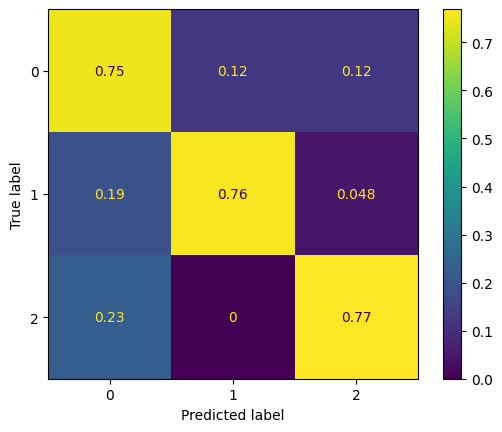

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(test_T.iloc[:,-1], prediction)

cm = confusion_matrix(test_T.iloc[:,-1], prediction, labels=[0,1,2],normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
disp.plot()
plt.show()

In [52]:
confusion_matrix(test_T.iloc[:,-1], prediction)

array([[ 6,  1,  1],
       [ 4, 16,  1],
       [ 3,  0, 10]], dtype=int64)

### Accuracy, Recall, Precision, F1-Score

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('정확도:', accuracy_score(test_T.iloc[:,-1], prediction))
print('recall(재현율):', recall_score(test_T.iloc[:,-1], prediction,average='micro'))
print('precision(정밀도):', precision_score(test_T.iloc[:,-1], prediction,average='micro'))
print('F1점수:', f1_score(test_T.iloc[:,-1], prediction,average='micro'))


정확도: 0.7619047619047619
recall(재현율): 0.7619047619047619
precision(정밀도): 0.7619047619047619
F1점수: 0.7619047619047619


### 모델결과 막대그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.title("model test accuracy")
x=list(range(1,15))
model = [
'KNeighborsUnif',
'WeightedEnsemble_L2',
'CatBoost',
'NeuralNetFastAI',
'LightGBMXT',
'XGBoost',
'LightGBM',
'LightGBMLarge',
'NeuralNetTorch',
'ExtraTreesGini',
'ExtraTreesEntr',
'KNeighborsDist',
'RandomForestEntr',
'RandomForestGini']
values = [  0.880952, 0.880952, 0.857143, 0.857143, 0.833333, 0.809524, 0.785714, 0.785714, 0.785714, 0.785714, 0.785714, 0.761905,  0.761905, 0.761905]
plt.xticks(range(1,15), range(1,15)) 
plt.bar(x,values)

plt.show()

In [ ]:
plt.title("막대그래프(bar)")
x_data=[1,3,5,7,9]
y_data=[5,7,6,1,4]
plt.bar(x_data,y_data) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

In [ ]:
predictor.feature_importance(data=test_T)